# Bike Sharing Dataset Data Set

Attribute Information: <br>

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv <br>

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [15]:
import os
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Importing data and building dataset

In [3]:
df = pd.read_csv('bike_data/hour.csv', index_col='instant')

In [4]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011/1/1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011/1/1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011/1/1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011/1/1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011/1/1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012/12/31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012/12/31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012/12/31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


## EDA

In [5]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

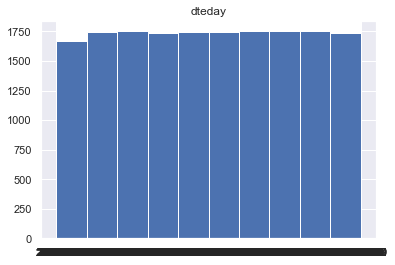

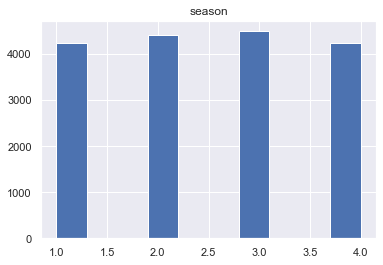

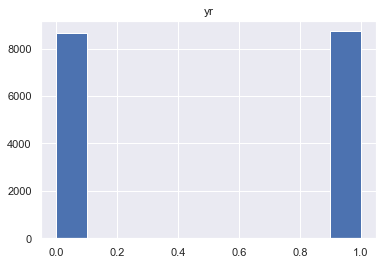

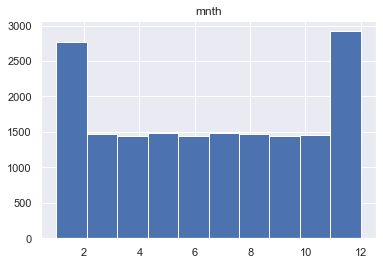

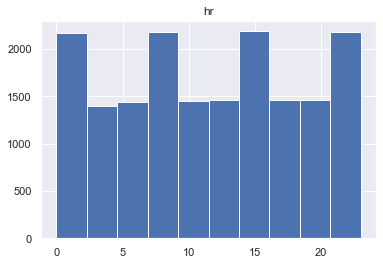

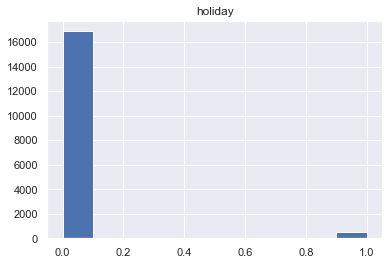

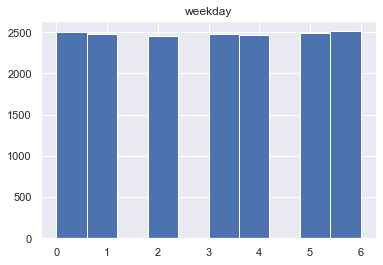

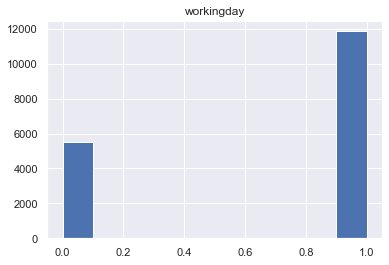

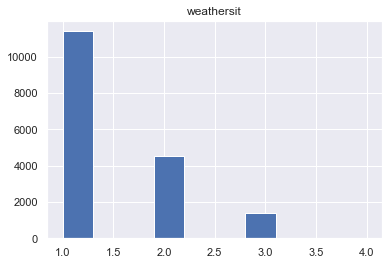

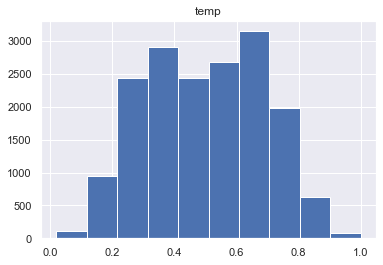

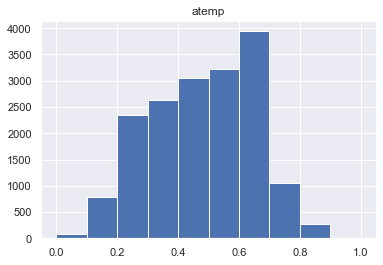

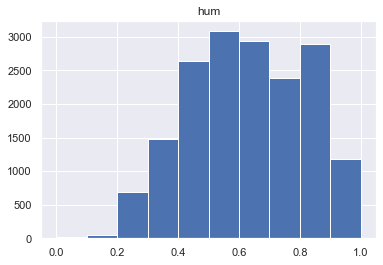

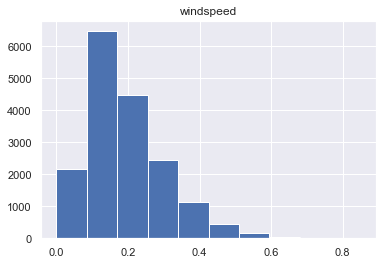

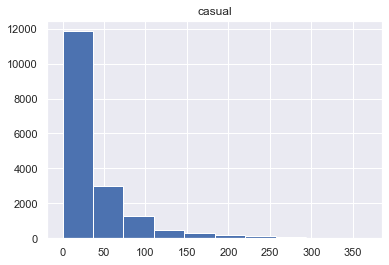

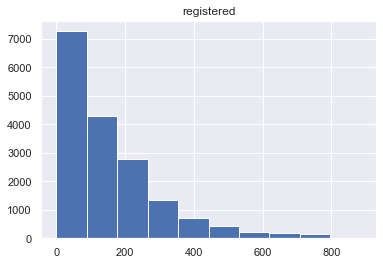

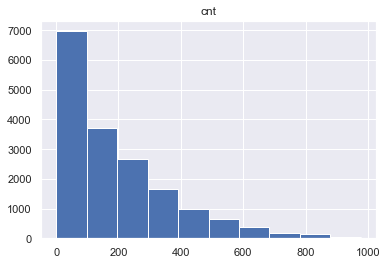

In [7]:
cols = df.columns

for c in cols:
    plt.hist(df[c])
    plt.title(c)
    plt.show()

In [8]:
df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [9]:
df2 = df.groupby('dteday')['cnt'].sum()

df2 = df2.reset_index()

df2

,dteday,cnt
0,2011/1/1,985
1,2011/1/10,1321
2,2011/1/11,1263
3,2011/1/12,1162
4,2011/1/13,1406
...,...,...
726,2012/9/5,7112
727,2012/9/6,6203
728,2012/9/7,7504
729,2012/9/8,5976


In [10]:
df2['dtday'] = pd.to_datetime(df2.dteday)

df2.drop(['dteday'], axis=1, inplace=True)

df2

,cnt,dtday
0,985,2011-01-01
1,1321,2011-01-10
2,1263,2011-01-11
3,1162,2011-01-12
4,1406,2011-01-13
...,...,...
726,7112,2012-09-05
727,6203,2012-09-06
728,7504,2012-09-07
729,5976,2012-09-08


In [11]:
df2 = df2.resample('w', on = 'dtday').mean()

df2 = df2.reset_index()

df2

,dtday,cnt
0,2011-01-02,893.000000
1,2011-01-09,1344.000000
2,2011-01-16,1289.285714
3,2011-01-23,1252.857143
4,2011-01-30,1099.857143
...,...,...
101,2012-12-09,5394.571429
102,2012-12-16,5138.000000
103,2012-12-23,3813.714286
104,2012-12-30,1531.428571


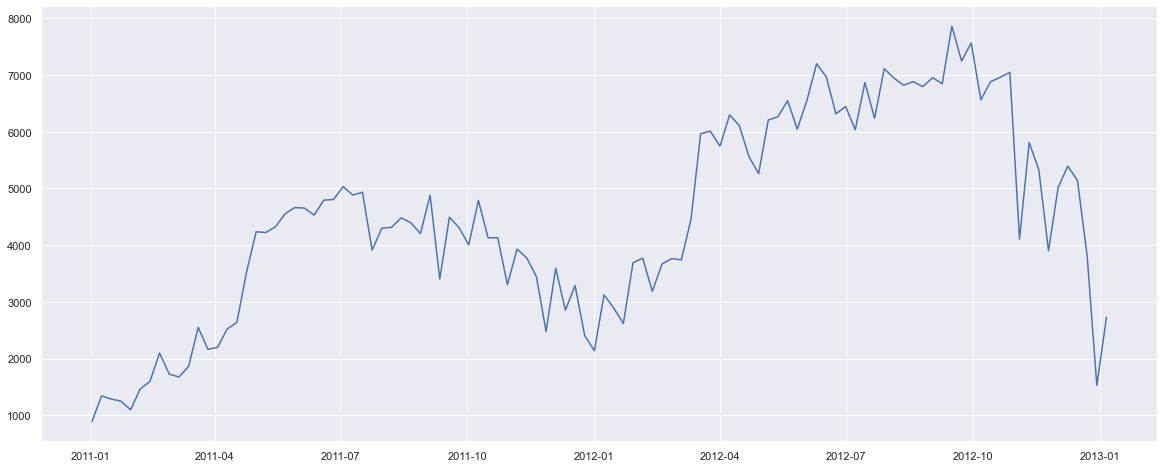

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df2.dtday, df2.cnt)
plt.show()

**Observation**: there is a overall trend cross the year. year of 2011, peak value is around May to October. Year of 2012, the peak is around April to Octobor. Overall, 2012 has larger accumulated usage than 2011.

In [13]:
df3 = df.groupby(['dteday','weekday'])['cnt'].sum()

df3 = df3.reset_index()
df3

,dteday,weekday,cnt
0,2011/1/1,6,985
1,2011/1/10,1,1321
2,2011/1/11,2,1263
3,2011/1/12,3,1162
4,2011/1/13,4,1406
...,...,...,...
726,2012/9/5,3,7112
727,2012/9/6,4,6203
728,2012/9/7,5,7504
729,2012/9/8,6,5976


In [14]:
aa = df3[df3.weekday==5].dteday.to_list()[0:len(df3[df3.weekday==5].dteday.to_list()):7]

bb = []
for a in aa:
    #print(a)
    bb.append(datetime.datetime.strftime(datetime.datetime.strptime(a, '%Y/%m/%d') + datetime.timedelta(days=1), '%Y/%m/%d'))

print(bb)

['2011/01/15', '2011/10/08', '2011/12/24', '2011/03/12', '2011/04/30', '2011/06/18', '2011/07/09', '2011/09/24', '2012/10/13', '2012/12/01', '2012/02/18', '2012/03/10', '2012/05/26', '2012/07/14', '2012/08/04']


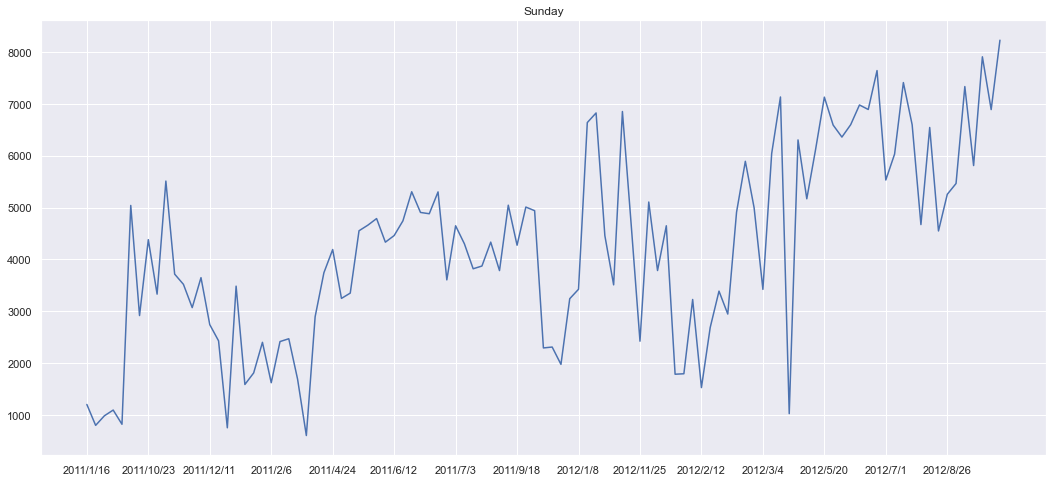

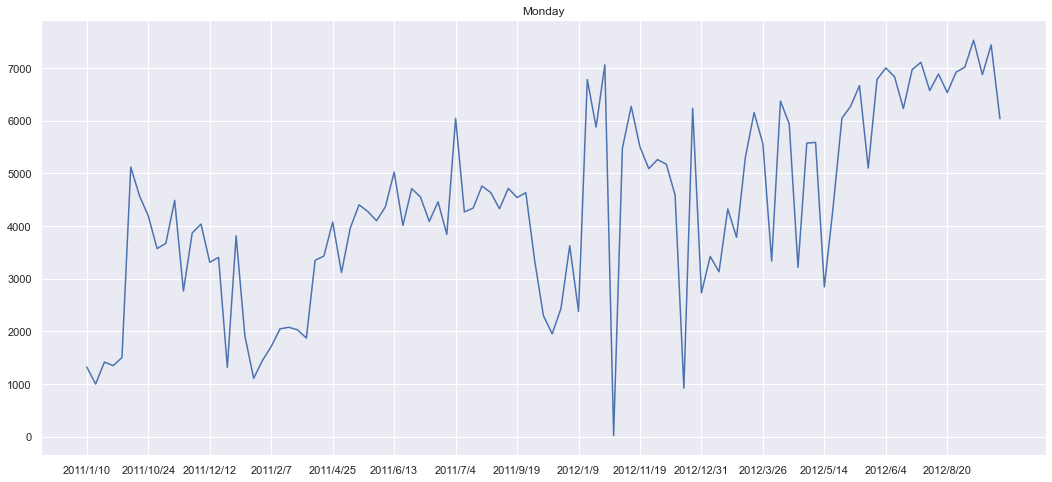

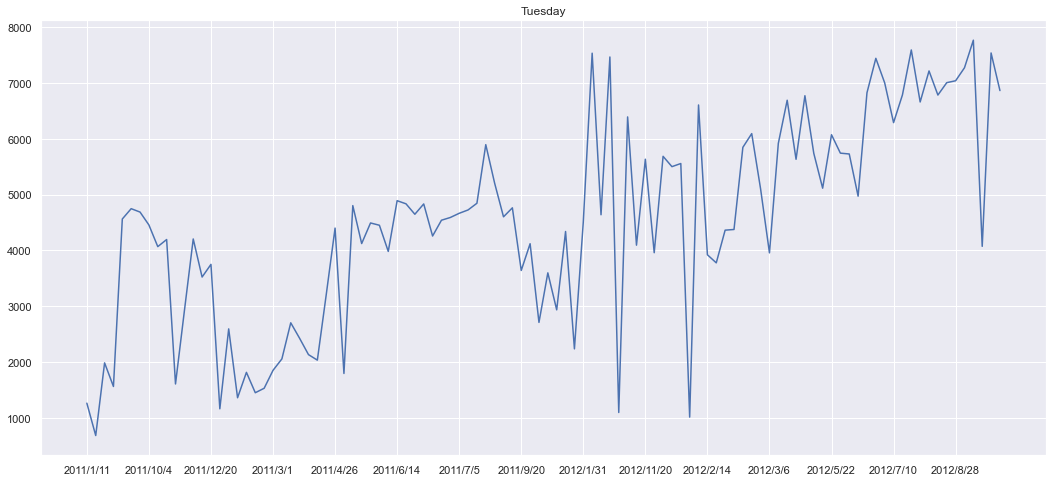

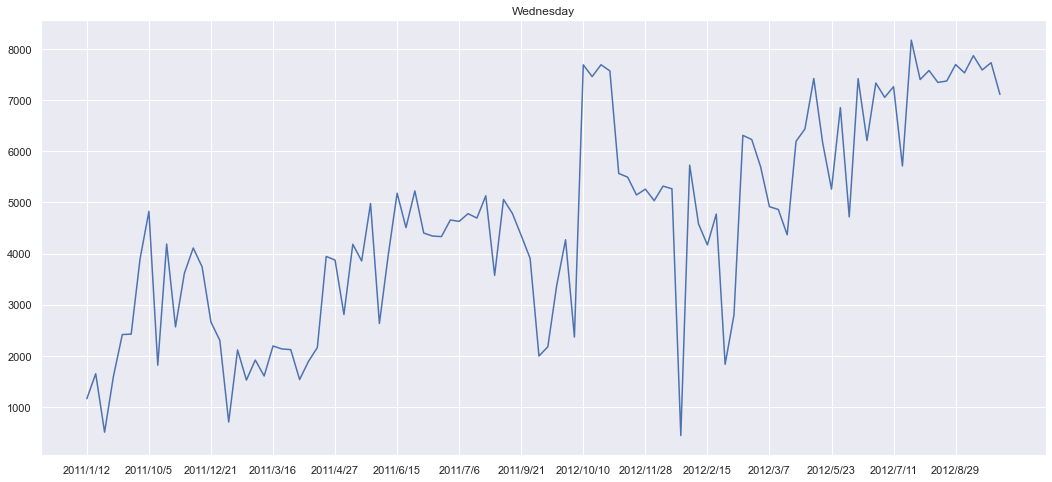

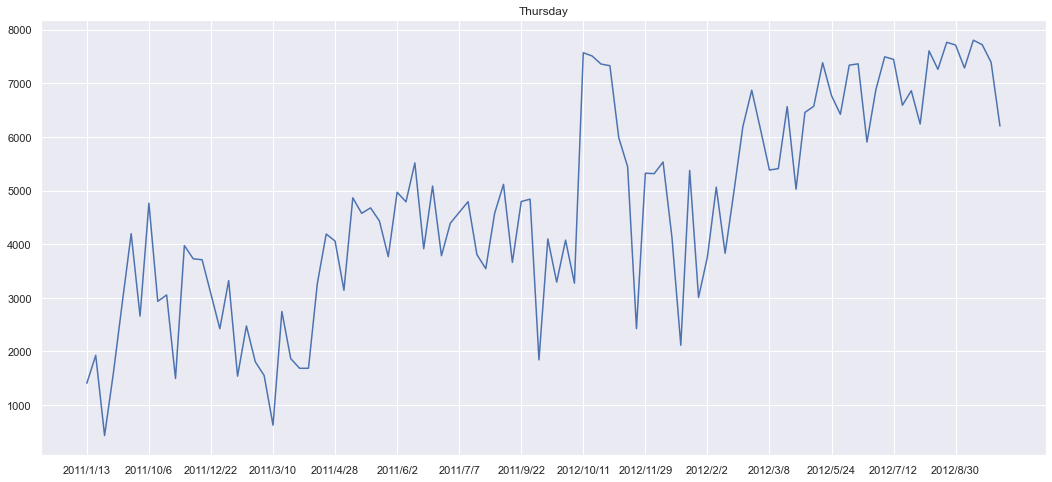

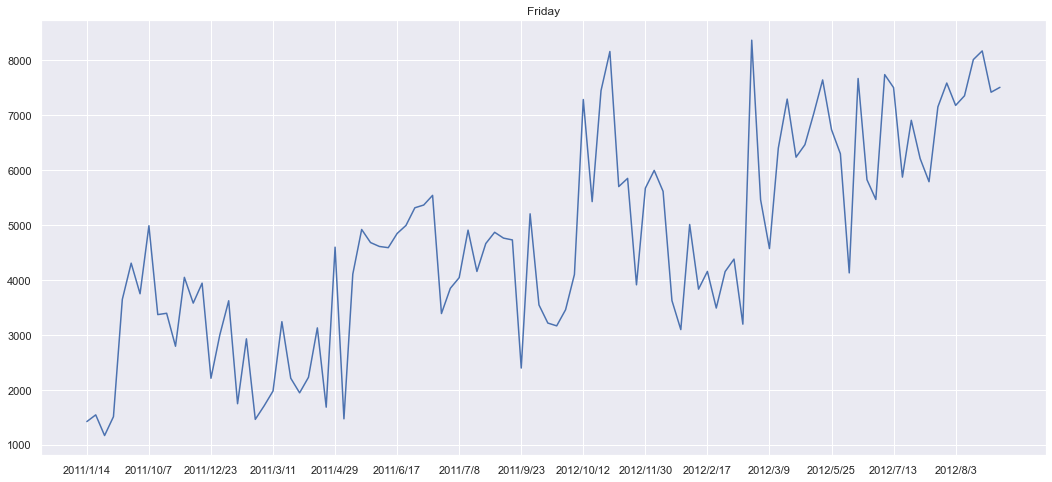

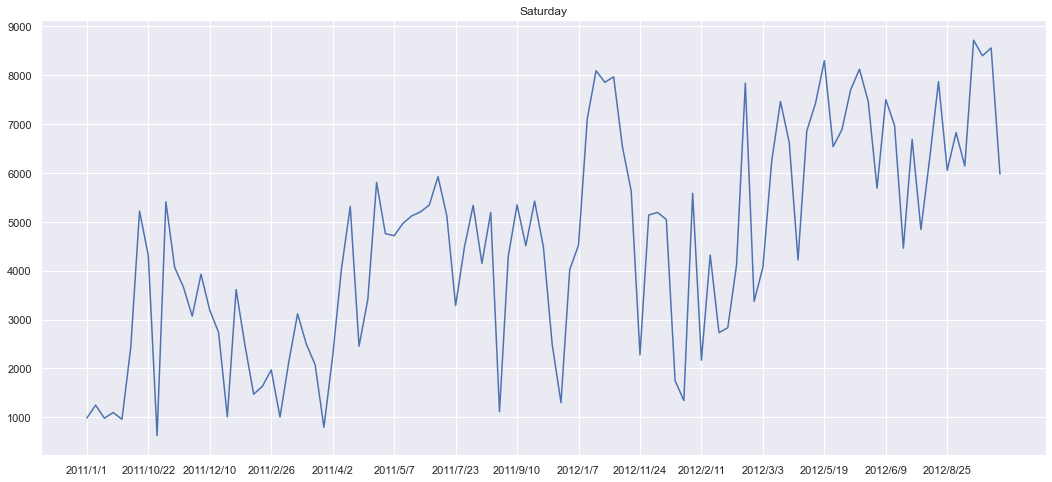

In [16]:
#fig, axes = plt.subplots(7,1, figsize=(18,6))
weekname = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
for i in range(7):
    plt.figure(figsize=(18,8))
    plt.plot(df3.dteday[df3.weekday==i], df3[df3.weekday==i]['cnt'])#, color='r')
    plt.xticks(df3[df3.weekday==i].dteday.to_list()[0:len(df3[df3.weekday==i].dteday.to_list()):7])
    plt.title(weekname[i])
    plt.show()

In [17]:
df.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [18]:
df[df.holiday==1]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
373,2011/1/17,1,0,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
374,2011/1/17,1,0,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
375,2011/1/17,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
376,2011/1/17,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
377,2011/1/17,1,0,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17231,2012/12/25,1,1,12,19,1,2,0,2,0.32,0.3030,0.66,0.2239,16,20,36
17232,2012/12/25,1,1,12,20,1,2,0,2,0.32,0.3030,0.66,0.2836,11,29,40
17233,2012/12/25,1,1,12,21,1,2,0,2,0.30,0.2879,0.65,0.1940,8,26,34


In [19]:
df[df.holiday==1]['dteday'].unique()

array(['2011/1/17', '2011/2/21', '2011/4/15', '2011/5/30', '2011/7/4',
       '2011/9/5', '2011/10/10', '2011/11/11', '2011/11/24', '2011/12/26',
       '2012/1/2', '2012/1/16', '2012/2/20', '2012/4/16', '2012/5/28',
       '2012/7/4', '2012/9/3', '2012/10/8', '2012/11/12', '2012/11/22',
       '2012/12/25'], dtype=object)

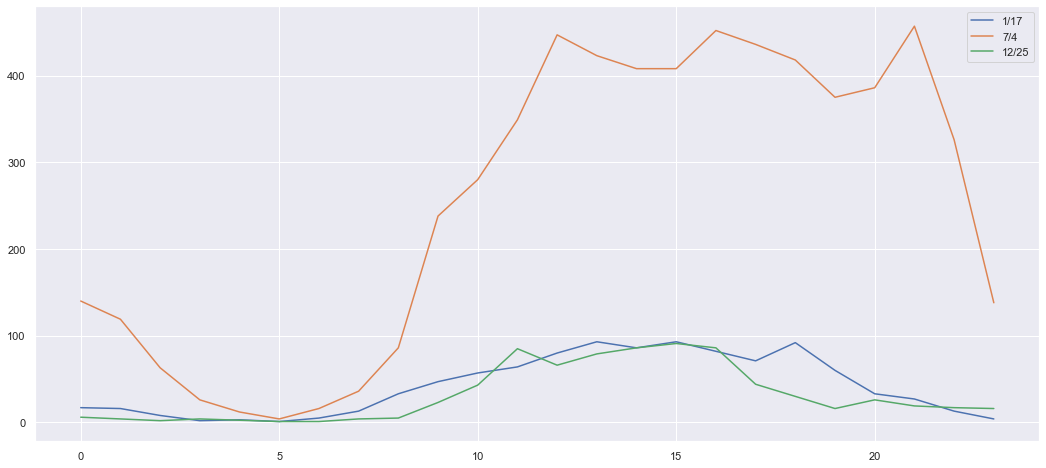

In [20]:
# randomly pick couple of holidays to see day trend
plt.figure(figsize=(18,8))
plt.plot(df[df.dteday=='2011/1/17']['hr'],df[df.dteday=='2011/1/17']['cnt'])
plt.plot(df[df.dteday=='2011/7/4']['hr'],df[df.dteday=='2011/7/4']['cnt'])
plt.plot(df[df.dteday=='2011/12/25']['hr'],df[df.dteday=='2011/12/25']['cnt'])
plt.legend(['1/17','7/4','12/25'])
plt.show()

In [21]:
df[df.holiday==0]['dteday'].unique()

array(['2011/1/1', '2011/1/2', '2011/1/3', '2011/1/4', '2011/1/5',
       '2011/1/6', '2011/1/7', '2011/1/8', '2011/1/9', '2011/1/10',
       '2011/1/11', '2011/1/12', '2011/1/13', '2011/1/14', '2011/1/15',
       '2011/1/16', '2011/1/18', '2011/1/19', '2011/1/20', '2011/1/21',
       '2011/1/22', '2011/1/23', '2011/1/24', '2011/1/25', '2011/1/26',
       '2011/1/27', '2011/1/28', '2011/1/29', '2011/1/30', '2011/1/31',
       '2011/2/1', '2011/2/2', '2011/2/3', '2011/2/4', '2011/2/5',
       '2011/2/6', '2011/2/7', '2011/2/8', '2011/2/9', '2011/2/10',
       '2011/2/11', '2011/2/12', '2011/2/13', '2011/2/14', '2011/2/15',
       '2011/2/16', '2011/2/17', '2011/2/18', '2011/2/19', '2011/2/20',
       '2011/2/22', '2011/2/23', '2011/2/24', '2011/2/25', '2011/2/26',
       '2011/2/27', '2011/2/28', '2011/3/1', '2011/3/2', '2011/3/3',
       '2011/3/4', '2011/3/5', '2011/3/6', '2011/3/7', '2011/3/8',
       '2011/3/9', '2011/3/10', '2011/3/11', '2011/3/12', '2011/3/13',
       '2011/3/14',

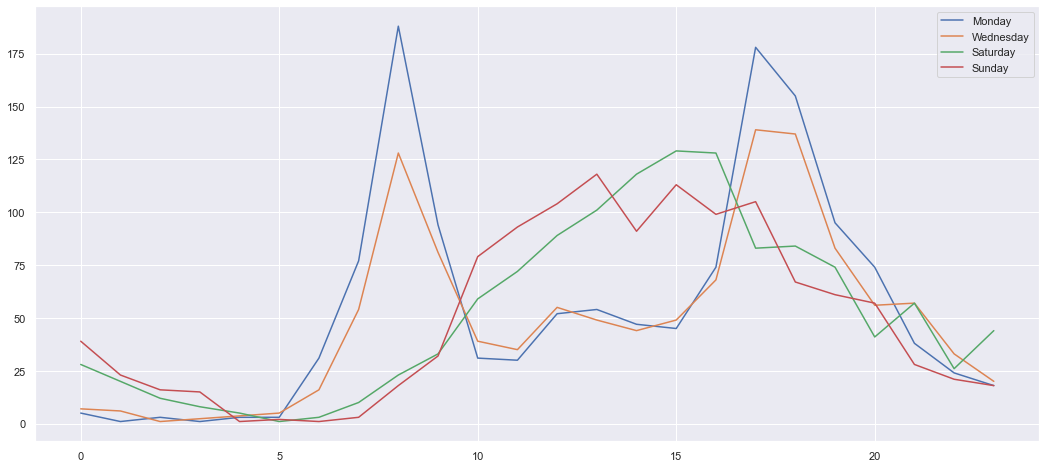

In [22]:
# randomly pick couple of days 
# 1/10, 1/12 are Monday and Wednesday, 1/15,1/16 are Saturday and Sunday
plt.figure(figsize=(18,8))
plt.plot(df[df.dteday=='2011/1/10']['hr'],df[df.dteday=='2011/1/10']['cnt'])
plt.plot(df[df.dteday=='2011/1/12']['hr'],df[df.dteday=='2011/1/12']['cnt'])
plt.plot(df[df.dteday=='2011/1/15']['hr'],df[df.dteday=='2011/1/15']['cnt'])
plt.plot(df[df.dteday=='2011/1/16']['hr'],df[df.dteday=='2011/1/16']['cnt'])
plt.legend(['Monday','Wednesday','Saturday','Sunday'])
plt.show()

**Observations**: The pattern of Weekdays has 2 peaks, first one is ~7/8 in the morning; the second one is ~5/6 <br>
The pattern for weekend only has 1 peak which last from ~10am to ~4pm.

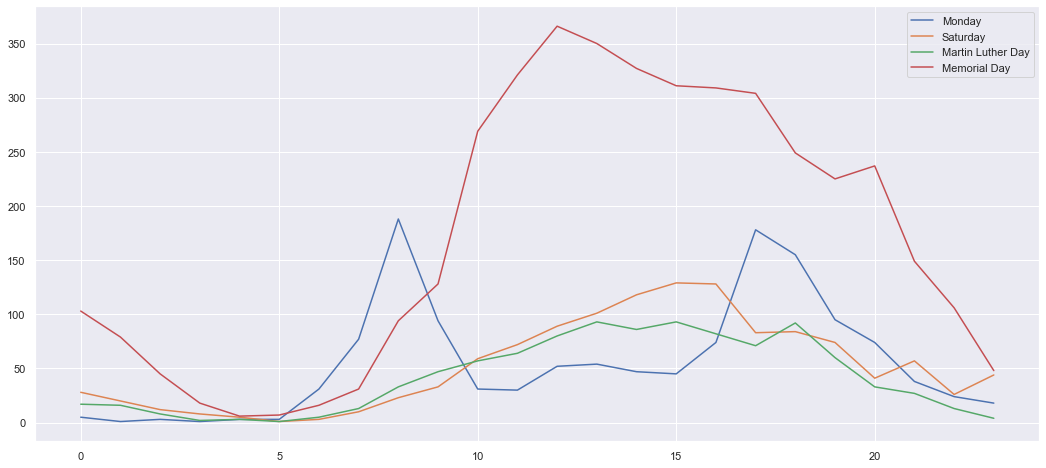

In [23]:
# 1/10 is Monday, 1/15 is Saturday, 1/17 and 4/15 are holidays
plt.figure(figsize=(18,8))
plt.plot(df[df.dteday=='2011/1/10']['hr'],df[df.dteday=='2011/1/10']['cnt'])
plt.plot(df[df.dteday=='2011/1/15']['hr'],df[df.dteday=='2011/1/15']['cnt'])
plt.plot(df[df.dteday=='2011/1/17']['hr'],df[df.dteday=='2011/1/17']['cnt'])
plt.plot(df[df.dteday=='2011/5/30']['hr'],df[df.dteday=='2011/5/30']['cnt'])
plt.legend(['Monday','Saturday','Martin Luther Day','Memorial Day'])
plt.show()

**Observations**: by comparing weekday, weekend, Martin Luther day and Memorial day in 2011, weekends and holidays only have 1 peak in general. the lasting time period and magnitude diffs from holiday to holiday. 

**Summary**: 
1) There is a yearly seasonality. The peak month is around April to Octorbor. <br>
2) The pattern of weekdays diffs from weekends. Weekdays have 2 peaks. one is in the morning. Another one is in the afternoon <br>
3) The pattern of holidays is similarly like weekends - only 1 peak from later morning time to afternoon. However, the pattern range and magnitude of holidays diffs from each other. 

## Data preparation for modeling

In [24]:
def select_columns(df):
    cols_to_keep = [       
      'cnt',
      'temp',
      'hum',
      'windspeed',
      'yr',
      'mnth', 
      'hr', 
      'holiday', 
      'weekday', 
      'workingday']
    df_subset = df[cols_to_keep]
    return df_subset

def onehot_encode_integers(df, excluded_cols):
    df = df.copy()

    int_cols = [col for col in df.select_dtypes(include=['int']) if col not in excluded_cols]

    df.loc[:, int_cols] = df.loc[:, int_cols].astype('str')

    df_encoded = pd.get_dummies(df)
    return df_encoded

def normalize_cnt(df):
    df = df.copy()
    df['cnt'] = df['cnt'] / df['cnt'].max()
    return df

In [25]:
dataset = (df.pipe(select_columns).pipe(onehot_encode_integers, excluded_cols=['cnt']).pipe(normalize_cnt))

In [26]:
dataset

,cnt,temp,hum,windspeed,yr,mnth,hr,holiday,weekday,workingday
instant,,,,,,,,,,
1,0.016377,0.24,0.81,0.0000,0,1,0,0,6,0
2,0.040942,0.22,0.80,0.0000,0,1,1,0,6,0
3,0.032753,0.22,0.80,0.0000,0,1,2,0,6,0
4,0.013306,0.24,0.75,0.0000,0,1,3,0,6,0
5,0.001024,0.24,0.75,0.0000,0,1,4,0,6,0
...,...,...,...,...,...,...,...,...,...,...
17375,0.121801,0.26,0.60,0.1642,1,12,19,0,1,1
17376,0.091095,0.26,0.60,0.1642,1,12,20,0,1,1
17377,0.092119,0.26,0.60,0.1642,1,12,21,0,1,1


In [27]:
def create_dataset(df, n_deterministic_features,context_window, forecast_window, batch_size):
    shuffle_buffer_size = len(df)
    # context_window + forecast_window
    total_size = context_window + forecast_window

    data = tf.data.Dataset.from_tensor_slices(df.values)

    # selecting windows
    data = data.window(total_size, shift=1, drop_remainder=True)
    data = data.flat_map(lambda k: k.batch(total_size))

    # shuffling data
    data = data.shuffle(shuffle_buffer_size, seed=42)

    # extracting past features + deterministic future + labels
    data = data.map(lambda k: ((k[:-forecast_window], k[-forecast_window:, -n_deterministic_features:]), k[-forecast_window:,0]))
  
    return data.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [28]:
dataset

,cnt,temp,hum,windspeed,yr,mnth,hr,holiday,weekday,workingday
instant,,,,,,,,,,
1,0.016377,0.24,0.81,0.0000,0,1,0,0,6,0
2,0.040942,0.22,0.80,0.0000,0,1,1,0,6,0
3,0.032753,0.22,0.80,0.0000,0,1,2,0,6,0
4,0.013306,0.24,0.75,0.0000,0,1,3,0,6,0
5,0.001024,0.24,0.75,0.0000,0,1,4,0,6,0
...,...,...,...,...,...,...,...,...,...,...
17375,0.121801,0.26,0.60,0.1642,1,12,19,0,1,1
17376,0.091095,0.26,0.60,0.1642,1,12,20,0,1,1
17377,0.092119,0.26,0.60,0.1642,1,12,21,0,1,1


In [35]:
# times at which to split train/validation and validation/test
val_time = 10000
test_time = 14000

context_length = 24 * 7 * 3 # three weeks
# How far ahead do we want to generate forecasts?
forecast_length = 24 * 3 # five days

# auxiliary constants
n_total_features = len(dataset.columns)
exclude_colums = ['cnt','temp','hum','windspeed']
n_exclude_features = len(exclude_colums)
n_deterministic_features = n_total_features - n_exclude_features

# splitting dataset into train/val/test
training_data = dataset.iloc[:val_time]
validation_data = dataset.iloc[val_time:test_time]
test_data = dataset.iloc[test_time:]


# Now we get training, validation, and test as tf.data.Dataset objects

batch_size = 32

training_windowed = create_dataset(training_data, 
                                   n_deterministic_features,
                                   context_length,
                                   forecast_length,
                                   batch_size)

validation_windowed = create_dataset(validation_data, 
                                     n_deterministic_features,
                                     context_length,
                                     forecast_length,
                                     batch_size)

test_windowed = create_dataset(test_data, 
                               n_deterministic_features,
                               context_length,
                               forecast_length,
                               batch_size=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

# Model building/training (point predictions)

In [36]:
latent_dim = 16

# First branch of the net is an lstm which finds an embedding for the past
past_inputs = tf.keras.Input(shape=(context_length, n_total_features), name='past_inputs')
# Encoding the past
encoder = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(past_inputs)

future_inputs = tf.keras.Input(shape=(forecast_length,n_deterministic_features), name='future_inputs')
# Combining future inputs with recurrent branch output
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True)
x = decoder_lstm(future_inputs, initial_state=[state_h, state_c])

x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='relu')(x)

model = tf.keras.models.Model(inputs=[past_inputs, future_inputs], outputs=output)

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.Huber()
model.compile(loss=loss, optimizer=optimizer, metrics=["mae"])

history = model.fit(training_windowed, epochs=25, validation_data=validation_windowed)

Epoch 1/25
295/295 [==============================] - 44s 150ms/step - loss: 0.0060 - mae: 0.0779 - val_loss: 0.0215 - val_mae: 0.1363
Epoch 2/25
295/295 [==============================] - 41s 139ms/step - loss: 0.0040 - mae: 0.0617 - val_loss: 0.0134 - val_mae: 0.1091
Epoch 3/25
295/295 [==============================] - 75s 256ms/step - loss: 0.0024 - mae: 0.0464 - val_loss: 0.0117 - val_mae: 0.1026
Epoch 4/25
295/295 [==============================] - 64s 215ms/step - loss: 0.0019 - mae: 0.0409 - val_loss: 0.0133 - val_mae: 0.1119
Epoch 5/25
295/295 [==============================] - 57s 195ms/step - loss: 0.0017 - mae: 0.0383 - val_loss: 0.0114 - val_mae: 0.1020
Epoch 6/25
295/295 [==============================] - 46s 157ms/step - loss: 0.0016 - mae: 0.0364 - val_loss: 0.0121 - val_mae: 0.1058
Epoch 7/25
295/295 [==============================] - 51s 172ms/step - loss: 0.0014 - mae: 0.0348 - val_loss: 0.0111 - val_mae: 0.1010
Epoch 8/25
295/295 [==============================] - 4

In [37]:
model.evaluate(test_windowed)

2804/2804 [==============================]0091 - mae: 0.09 - 44s 16ms/step - loss: 0.0091 - mae: 0.0901


[0.009110935963690281, 0.09009195119142532]

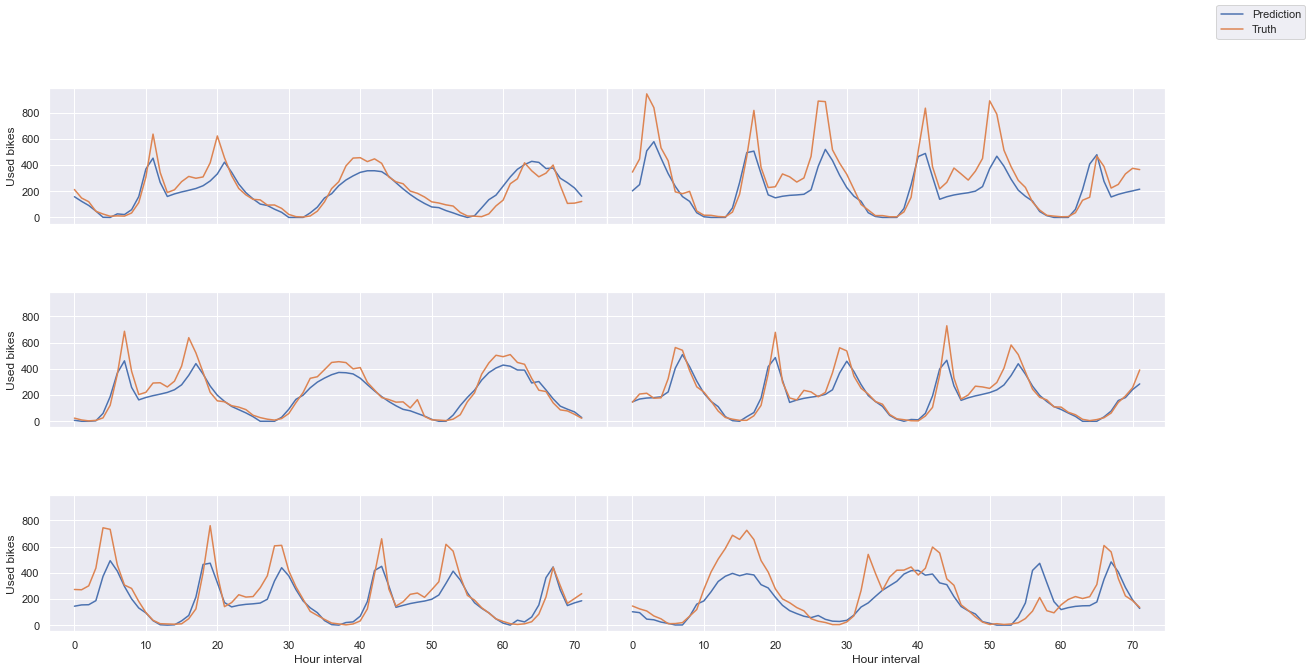

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex='all', sharey='all', figsize=(20, 10))

# We need to rescale cnt
scaling_factor = df.cnt.max()

for i, data in enumerate(test_windowed.take(6)):
    (past, future), truth = data

    truth = truth * scaling_factor
    pred = model.predict((past, future)) * scaling_factor

    row = i//2
    col = i%2

    ax[row][col].plot(pred.flatten(), label='Prediction')
    ax[row][col].plot(truth.numpy().flatten(),label='Truth')

# Labeling axes
for i in range(2):
    ax[2][i].set_xlabel('Hour interval')
for i in range(3):
    ax[i][0].set_ylabel('Used bikes')

handles, labels = ax[0][0].get_legend_handles_labels()
fig.subplots_adjust(wspace=0, hspace=0.5)
fig.legend(handles, labels, loc='upper right')
plt.show()